# Household Income Data Set Prediction

###### Implementing K-Nearest-Neighbors in the Household Income Data Set, in order to predict levels os poverty in Costa Rica.


In [113]:
# Importing the libraries

import numpy as np
import pandas as pd
import sklearn
import matplotlib as plt

In [114]:
# Uploading the data set

raw_train = pd.read_csv("train.csv", sep=r'\s*,\s*', engine='python', na_values="?")

In [21]:
raw_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [22]:
raw_train.shape

(9557, 143)

In [38]:
# Replacing string values for numeric ones

raw_train_ = raw_train.replace(np.nan,'0', regex=True)
raw_train__ = raw_train_.replace("no",'0', regex=False)
rraw_train = raw_train__.replace("yes",'1', regex=False)

In [39]:
rraw_train.head(20)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000,0,3,0,1,1,0,0,0,...,100,1849,1,100,0,1.000000,0.0,100,1849,4
1,ID_f29eb3ddd,135000,0,4,0,1,1,1,1,0,...,144,4489,1,144,0,1.000000,64.0,144,4489,4
2,ID_68de51c94,0,0,8,0,1,1,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121,8464,4
3,ID_d671db89c,180000,0,5,0,1,1,1,1,0,...,81,289,16,121,4,1.777778,1.0,121,289,4
4,ID_d56d6f5f5,180000,0,5,0,1,1,1,1,0,...,121,1369,16,121,4,1.777778,1.0,121,1369,4
5,ID_ec05b1a7b,180000,0,5,0,1,1,1,1,0,...,121,1444,16,121,4,1.777778,1.0,121,1444,4
6,ID_e9e0c1100,180000,0,5,0,1,1,1,1,0,...,4,64,16,121,4,1.777778,1.0,121,64,4
7,ID_3e04e571e,130000,1,2,0,1,1,0,0,0,...,0,49,16,81,4,16.000000,1.0,100,49,4
8,ID_1284f8aad,130000,1,2,0,1,1,0,0,0,...,81,900,16,81,4,16.000000,1.0,100,900,4
9,ID_51f52fdd2,130000,1,2,0,1,1,0,0,0,...,121,784,16,81,4,16.000000,1.0,100,784,4


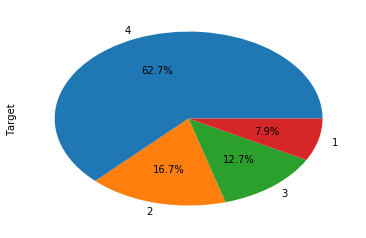

In [115]:
# Some data visualization

rraw_train.Target.value_counts().plot(kind="pie", autopct='%1.1f%%')

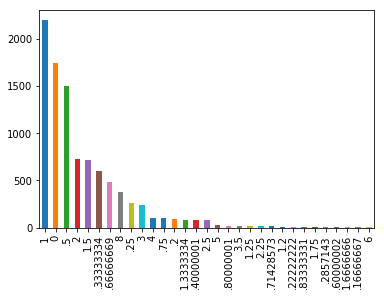

In [43]:
rraw_train.dependency.value_counts().plot(kind="bar")

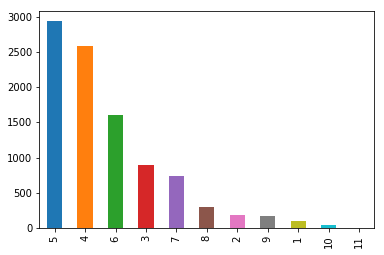

In [44]:
rraw_train.rooms.value_counts().plot(kind="bar")

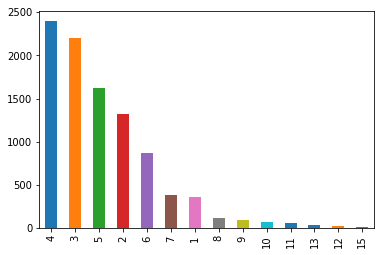

In [45]:
rraw_train.tamviv.value_counts().plot(kind="bar")

In [53]:
rraw_train.corr().Target

hacdor            -0.191714
rooms              0.226208
hacapo            -0.138008
v14a               0.063382
refrig             0.126792
v18q               0.238864
r4h1              -0.229889
r4h2               0.101253
r4h3              -0.043359
r4m1              -0.253163
r4m2              -0.036959
r4m3              -0.173931
r4t1              -0.316745
r4t2               0.048904
r4t3              -0.147548
tamhog            -0.147642
tamviv            -0.158224
escolari           0.302305
hhsize            -0.147642
paredblolad        0.261274
paredzocalo       -0.079199
paredpreb         -0.099002
pareddes          -0.082923
paredmad          -0.168237
paredzinc         -0.051806
paredfibras       -0.027730
paredother        -0.000629
pisomoscer         0.280284
pisocemento       -0.205439
pisoother          0.021219
                     ...   
instlevel9         0.083856
bedrooms           0.166943
overcrowding      -0.289110
tipovivi1         -0.007435
tipovivi2          0

In [75]:
# Selecting most correlated values in order to improve the prediction

lista = []
lista_scores = []
lista_atrib = []
for i in range(len(rraw_train.corr().Target)-1):
    if abs(rraw_train.corr().Target[i])>0.15:
        lista.append((rraw_train.corr().Target.index[i], rraw_train.corr().Target[i]))
        lista_scores.append(rraw_train.corr().Target[i])
        lista_atrib.append(rraw_train.corr().Target.index[i])

In [77]:
lista_atrib

['hacdor',
 'rooms',
 'v18q',
 'r4h1',
 'r4m1',
 'r4m3',
 'r4t1',
 'tamviv',
 'escolari',
 'paredblolad',
 'paredmad',
 'pisomoscer',
 'pisocemento',
 'cielorazo',
 'energcocinar2',
 'energcocinar4',
 'elimbasu1',
 'epared1',
 'epared2',
 'epared3',
 'etecho1',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'hogar_nin',
 'hogar_adul',
 'instlevel2',
 'instlevel8',
 'bedrooms',
 'overcrowding',
 'computer',
 'television',
 'qmobilephone',
 'lugar1',
 'SQBescolari',
 'SQBedjefe',
 'SQBhogar_nin',
 'SQBovercrowding']

In [79]:
lista_scores

[-0.19171418132477863,
 0.22620779724852363,
 0.2388637240203612,
 -0.22988880955570312,
 -0.2531631670637918,
 -0.17393083564080314,
 -0.3167448920689006,
 -0.15822385490998275,
 0.3023052374515464,
 0.2612736273046757,
 -0.16823711298653277,
 0.2802843798663342,
 -0.20543914557543633,
 0.3044210828231205,
 0.15645706344889043,
 -0.16236583890396175,
 0.16005125241372622,
 -0.20302482332349014,
 -0.17733442356223883,
 0.29245110572948313,
 -0.19083679597309403,
 0.2573775535737886,
 -0.20803823919878198,
 -0.17942067542164858,
 0.29422189332879156,
 -0.3281988094920038,
 0.1601325546191608,
 -0.15920951759696134,
 0.21435122056422698,
 0.16694327425635233,
 -0.2891099342032484,
 0.1831128113054524,
 0.15706499323777434,
 0.19970712434403876,
 0.17335887431819974,
 0.29657655310807235,
 0.2463678265731354,
 -0.3111855597497552,
 -0.2587436167425804]

In [80]:
# Defining actual training data

Xtrain = rraw_train[lista_atrib]
Ytrain = rraw_train.Target

In [83]:
# Uploading test data

raw_test = pd.read_csv("test.csv", sep=r'\s*,\s*', engine='python', na_values="?")

In [105]:
raw_test.head(20)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.250000,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.250000,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.250000,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.000000,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.250000,64.00,NaN,324
5,ID_e77d38d45,400000.0,0,3,0,1,1,1,1.0,0,...,38,256,1444,4,0,0,1.000000,0.00,182.25,1444
6,ID_3c5f4bd51,400000.0,0,3,0,1,1,1,1.0,0,...,42,121,1764,4,0,0,1.000000,0.00,182.25,1764
7,ID_a849c29bd,300000.0,0,6,0,1,1,1,1.0,0,...,21,196,441,4,0,0,0.250000,0.00,196.00,441
8,ID_472fa82da,300000.0,0,6,0,1,1,1,1.0,0,...,22,196,484,4,0,0,0.250000,0.00,196.00,484
9,ID_24864adcc,NaN,0,6,0,1,1,0,NaN,0,...,70,100,4900,1,0,0,0.111111,64.00,100.00,4900


In [106]:
raw_test.shape

(23856, 142)

In [86]:
# Replacing some useless values for useful ones

raw_test_ = raw_test.replace(np.nan,'0', regex=True)
raw_test__ = raw_test_.replace("no",'0', regex=False)
rraw_test = raw_test__.replace("yes",'1', regex=False)

In [87]:
rraw_test.head(20)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,0,0,5,0,1,1,0,0,1,...,4,0,16,9,0,1,2.250000,0.25,272.25,16
1,ID_1c78846d2,0,0,5,0,1,1,0,0,1,...,41,256,1681,9,0,1,2.250000,0.25,272.25,1681
2,ID_e5442cf6a,0,0,5,0,1,1,0,0,1,...,41,289,1681,9,0,1,2.250000,0.25,272.25,1681
3,ID_a8db26a79,0,0,14,0,1,1,1,1,0,...,59,256,3481,1,256,0,1.000000,0.00,256,3481
4,ID_a62966799,175000,0,4,0,1,1,1,1,0,...,18,121,324,1,0,1,0.250000,64.00,0,324
5,ID_e77d38d45,400000,0,3,0,1,1,1,1,0,...,38,256,1444,4,0,0,1.000000,0.00,182.25,1444
6,ID_3c5f4bd51,400000,0,3,0,1,1,1,1,0,...,42,121,1764,4,0,0,1.000000,0.00,182.25,1764
7,ID_a849c29bd,300000,0,6,0,1,1,1,1,0,...,21,196,441,4,0,0,0.250000,0.00,196,441
8,ID_472fa82da,300000,0,6,0,1,1,1,1,0,...,22,196,484,4,0,0,0.250000,0.00,196,484
9,ID_24864adcc,0,0,6,0,1,1,0,0,0,...,70,100,4900,1,0,0,0.111111,64.00,100,4900


In [88]:
# Defining actual testing data

test = rraw_test[lista_atrib]

In [90]:
test.head()

,hacdor,rooms,v18q,r4h1,r4m1,r4m3,r4t1,tamviv,escolari,paredblolad,...,bedrooms,overcrowding,computer,television,qmobilephone,lugar1,SQBescolari,SQBedjefe,SQBhogar_nin,SQBovercrowding
0,0,5,0,1,0,1,1,3,0,1,...,2,1.5,1,0,2,1,0,0,1,2.25
1,0,5,0,1,0,1,1,3,16,1,...,2,1.5,1,0,2,1,256,0,1,2.25
2,0,5,0,1,0,1,1,3,17,1,...,2,1.5,1,0,2,1,289,0,1,2.25
3,0,14,1,0,0,0,0,1,16,1,...,1,1.0,1,0,2,1,256,256,0,1.00
4,0,4,1,0,0,1,0,1,11,1,...,2,0.5,0,0,1,1,121,0,1,0.25


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [96]:
# Obtaining the best k for the kNN classifier

lista_knn = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, Xtrain, Ytrain, cv=10).mean()
    lista_knn.append(scores)

In [97]:
lista_knn

[0.5499245050457457,
 0.4978005727892162,
 0.5755660920765518,
 0.5733720587180081,
 0.5975503020266786,
 0.6026848291309557,
 0.6096967119622075,
 0.6129380896303664,
 0.6219412677760905,
 0.6223584702088085,
 0.6279081117527424,
 0.6259254823043927,
 0.6295892087971866,
 0.6319978133217276,
 0.629798963084778,
 0.6325217025882758,
 0.6353430192034186,
 0.6342985231917184,
 0.6367110729170475,
 0.6372341982126588,
 0.6380710254140458,
 0.6391174932311035,
 0.637337378414055,
 0.6397447778589751,
 0.6401616542233163,
 0.639637981038794,
 0.6401609947370639,
 0.6400580329074714,
 0.6398557352730965,
 0.6387062029845375]

In [99]:
max(lista_knn)

0.6401616542233163

In [100]:
# Since the best result came with k=25, we ought to implement it

def_knn = KNeighborsClassifier(n_neighbors=25)

In [101]:
def_knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [103]:
YtestPred = def_knn.predict(test)

In [104]:
YtestPred.shape

(23856,)

In [110]:
predict = pd.DataFrame(rraw_test.Id)
predict["Target"] = YtestPred
predict

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4
5,ID_e77d38d45,4
6,ID_3c5f4bd51,4
7,ID_a849c29bd,4
8,ID_472fa82da,4
9,ID_24864adcc,4


In [111]:
predict.to_csv("prediction.csv", index=False)